# Análise da turbina eólica

## Introdução

Energia eólica é a energia cinética proveniente da força de massas de ar em movimento (ventos), que é captada pelas turbinas dos aerogeradores e convertida em eletricidade.

Este material encontra-se dividido em três etapas: 
* 1ª Etapa:Tratamento dos dados;
* 2ª Etapa: Análises dos dados e conclusões;
* 3º Etapa: Predições da energia produzida;

## Objeto de análise:

A turbina em análise está sendo ativada por massas de ar. Assim, ela está produzindo energia elétrica.

**A potência de uma turbina eólica está relacionada com alguns parâmetros:**

* velocidade do vento;
* eficiência do gerador;
* massa específica do ar;
* área do rotor.

`VELOCIDADE DO VENTO:` é o principal parâmetro analisado, pois é a partir da sua velocidade que é gerada a energia cinética que esta será convertida em energia elétrica no gerador. Por isso, a angulação do vento entre ele a turbina é um fator pontual, pois a depender a direção que o vento está, ela não irá gerar movimento nas hélices.


## Objetivos

**OBJETIVOS DA EMPRESA:** A empresa `HEnergiaRenovável` delimitou as seguintes imposições e pedidos:
* Um relatório técnico sobre a análise;
* Produção mensal de energia; OK
* Produção de energia pela hora do dia; OK
* Identificar se existe alguma correlação entre as variáveis de análise; OK
* Identificar o nível médio de saída de energia para diferentes velocidades do vento;
    * em passos de 5 m/s
* Identificar quais direções de vento produzem maiores erros; OK
* Identificar a produção mensal média do ano de 2018 do primeiro semestre;
* Gráficos de comparação entre a potência real e a potência teórica; OK
* Identificar os valores de potência zero e fazer uma análise mais detalhada;
    * Identificar os outliers e verificar se devem ser utilizados ou não.
* Gerar arquivo csv contendo os dados não nulos de potência ativa e teórica;
* Dados com 5% para mais ou para menos do limite teórico devem ser desconsiderados;
    * Gerar uma coluna de erros
* Um sistema de predição de potência produzida a partir do banco de dados.
    * Identificar a melhor forma de subdividir o dataframe.
        



## Informações sobre o dataset e limitações

O dataset nos forcene os seguintes dados:

* Data da medição - medição em intervalos de 10 minutos;
* Potência ativa em kW - potência gerada pela fonte eólica;
* Velocidade do vento em m/s;
* Potência teórica em kwH;
* Direção do vento em graus.


**FONTE:**
* https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset
* https://www.kaggle.com/akdagmelih/wind-turbine-power-prediction-gbtregressor-pyspark/notebook
* https://www.kaggle.com/yohanesnuwara/wind-turbine-scada-analytics


**LIMITAÇÕES DA ANÁLISE:**
* Algumas medições não foram registradas, isto é, mesmo com velocidade de vento não foi computado o valor da potência produzida.

## Metodologia
* Para as análises e limpezada dos dados foi utilizada a linguagem de programação Python com a interface do Jupyter.

* Para as análises estatísticas foram utilizadas bibliotecas do Python.



## Importações iniciais

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

# configurações
import warnings
warnings.filterwarnings('ignore')

# 1º ETAPA: Tratamento do dados

**IMPORTANTO O DATAFRAME E FAZENDO AS VERIFICAÇÕES**

In [2]:
turbina_df = pd.read_csv('archive/T1.csv')
turbina_df.head(3)

Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789

In [7]:
!pip install pandas_profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached pydantic-1.9.0-cp38-cp38-win_amd64.whl (2.1 MB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl


In [9]:
import pandas_profiling

pandas_profiling.ProfileReport(turbina_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
turbina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


## Ajustando os nomes do DataFrame e modificando o tipo da coluna do tempo

In [7]:
# criando um dicionário para renomear as colunas
colunas = {
    'Date/Time':'data/tempo',
    'LV ActivePower (kW)':'potencia_ativa',
    'Wind Speed (m/s)':'velocidade_vento',
    'Theoretical_Power_Curve (KWh)':'potencia_teorica',
    'Wind Direction (°)':'direcao_vento'
}

# renomenado as colunas
turbina_df.rename(columns=colunas, inplace=True)

# mudando o formato da coluna do tempo para datetime
turbina_df['data/tempo'] = pd.to_datetime(turbina_df['data/tempo'])

# colocando o índice como a coluna do datetime
turbina_df.set_index('data/tempo', inplace=True)

# visualizando o dataframe modificado
turbina_df.head(3)

potencia_ativa  velocidade_vento  potencia_teorica  \
data/tempo                                                                
2018-01-01 00:00:00      380.047791          5.311336        416.328908   
2018-01-01 00:10:00      453.769196          5.672167        519.917511   
2018-01-01 00:20:00      306.376587          5.216037        390.900016   

                     direcao_vento  
data/tempo                          
2018-01-01 00:00:00     259.994904  
2018-01-01 00:10:00     268.641113  
2018-01-01 00:20:00     272.564789

In [8]:
turbina_df.describe()

potencia_ativa  velocidade_vento  potencia_teorica  direcao_vento
count    50530.000000      50530.000000      50530.000000   50530.000000
mean      1307.684332          7.557952       1492.175463     123.687559
std       1312.459242          4.227166       1368.018238      93.443736
min         -2.471405          0.000000          0.000000       0.000000
25%         50.677890          4.201395        161.328167      49.315437
50%        825.838074          7.104594       1063.776283      73.712978
75%       2482.507568         10.300020       2964.972462     201.696720
max       3618.732910         25.206011       3600.000000     359.997589

# 2º ETAPA: Análise de dados

## 1ª - Quantidade mensal de produção de energia

Existe alguma diferença entre os meses para a produção média de energia?

In [9]:
colunas = {
    1:'Janeiro',
    2:'Fevereiro',
    3:'Março',
    4:'Abril',
    5:'Maio',
    6:'Junho',
    7:'Julho',
    8:'Agosto',
    9:'Setembro',
    10:'Outubro',
    11:'Novembro',
    12:'Dezembro'
}

# criando o dataframe dos meses
energia_mensal = turbina_df.groupby(turbina_df.index.month).mean()

# renomeando as colunas dos índices
energia_mensal.rename(index=colunas, inplace=True)

# renomeando o nome da coluna dos índices
energia_mensal.index.name = 'Meses'

# vizualizando o dataframe
energia_mensal

potencia_ativa  velocidade_vento  potencia_teorica  direcao_vento
Meses                                                                       
Janeiro       1469.538834          9.407847       2051.432742     137.723051
Fevereiro     1398.812191          8.179499       1670.969069     124.670508
Março         1778.547254          9.204149       1899.451986     157.674416
Abril         1062.471714          6.740089       1186.013869      94.857182
Maio          1099.212305          6.693869       1271.246602     104.178431
Junho         1168.209523          6.844458       1330.927093     133.941694
Julho          694.432261          5.474675        781.056052     148.386055
Agosto        1510.816574          8.050320       1695.374114      88.250307
Setembro      1491.921321          7.704346       1601.570319     107.495466
Outubro       1178.213240          6.859317       1291.069849     120.533551
Novembro      1745.561611          8.871619       1857.157038     133.394652
Dezembro      1189.075727          7.169057       1423.850606     134.724835

Text(0.5, 0, 'Meses')

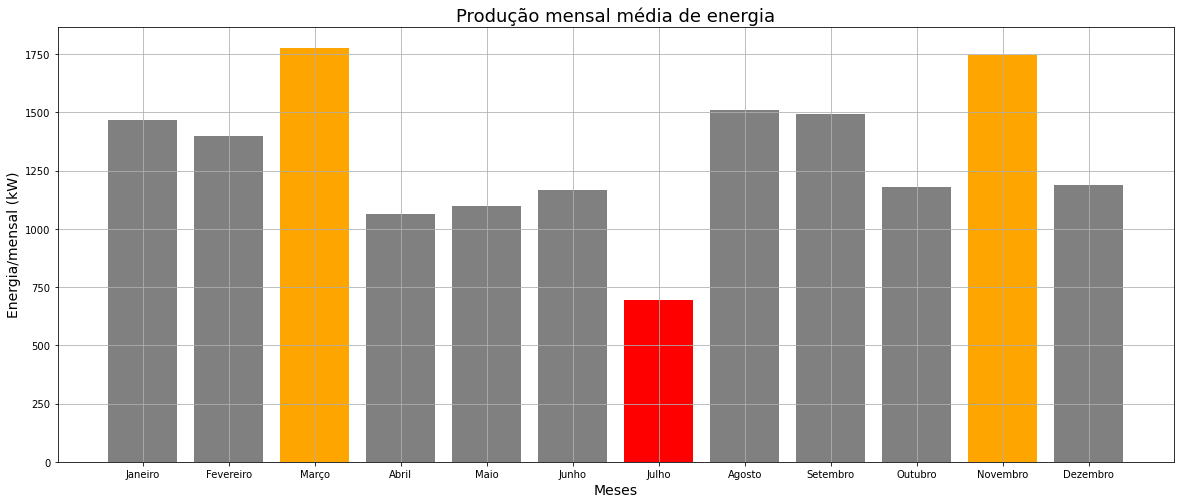

In [10]:
plt.figure(figsize=(20, 8))

color = list(np.full(12, 'grey'))
color[2], color[6], color[10] = 'orange', 'red', 'orange'

plt.grid()
plt.bar(energia_mensal.index, height=energia_mensal.potencia_ativa, color=color)

plt.title('Produção mensal média de energia', fontsize=18)
plt.ylabel('Energia/mensal (kW)', fontsize=14)
plt.xlabel('Meses', fontsize=14)

Text(0.5, 0, 'Meses')

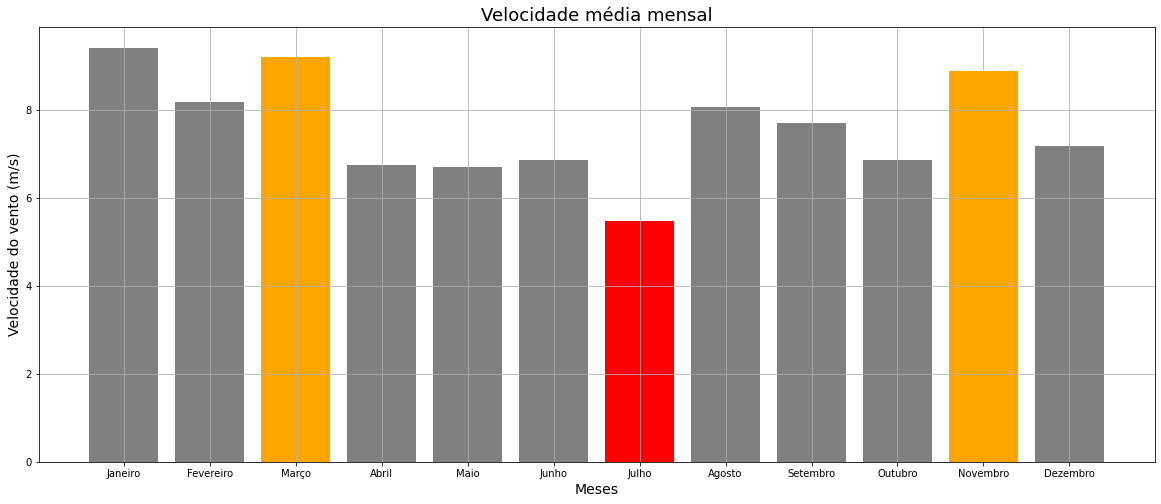

In [11]:
vento_mes = turbina_df.groupby(turbina_df.index.month).mean()

vento_mes.rename(index=colunas, inplace=True)

color = list(np.full(12, 'grey'))
color[2], color[6], color[10] = 'orange', 'red', 'orange'


plt.figure(figsize=(20, 8))
plt.grid()
plt.bar(x=vento_mes.index, height=vento_mes.velocidade_vento, color=color)
plt.title('Velocidade média mensal', fontsize=18)
plt.ylabel('Velocidade do vento (m/s)', fontsize=14)
plt.xlabel('Meses', fontsize=14)

Text(0.5, 0, 'Meses')

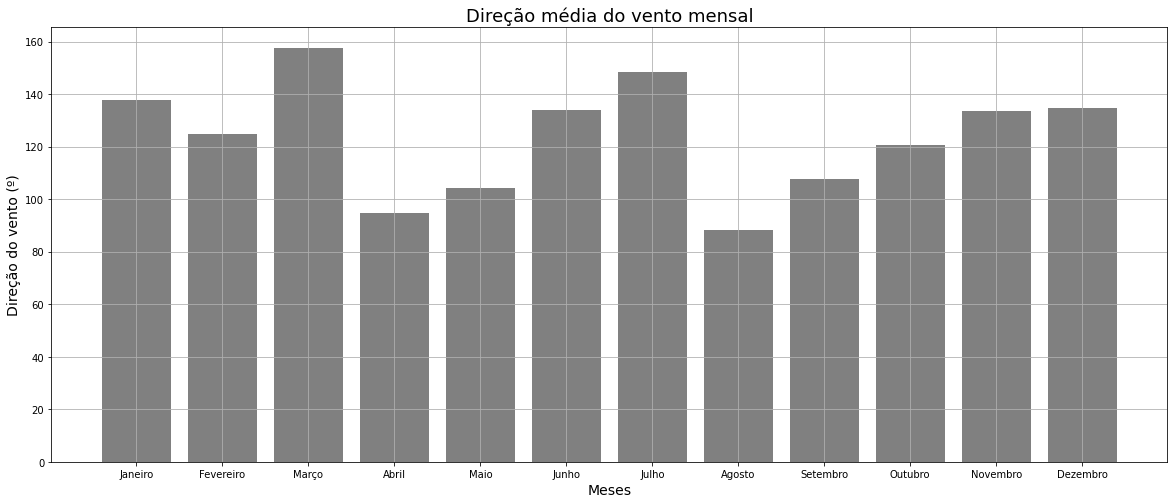

In [12]:
dir_vento_mes = turbina_df.groupby(turbina_df.index.month).mean()

dir_vento_mes.rename(index=colunas, inplace=True)

color = list(np.full(12, 'grey'))
plt.figure(figsize=(20, 8))
plt.grid()
plt.bar(x=vento_mes.index, height=vento_mes.direcao_vento, color=color)
plt.title('Direção média do vento mensal', fontsize=18)
plt.ylabel('Direção do vento (º)', fontsize=14)
plt.xlabel('Meses', fontsize=14)

**RESPOSTA:** Sim, existe uma diferença média de produção de energia. Os meses três piores meses são Julho, Maio e Abril. Sendo que nesses, o mês de menor produção é Julho. Os os meses de março e novembro têm a maior produção de energia média. Além disso, fica evidente a correlação positiva e alta entre velocidade de vento e produção de energia, ou seja, o crescimento de uma das variáveis influência no crescimento do outro. Contudo, a direção do vento é um fator importante, porém não tão impactante quanto a velocidade do vento. Portanto, conclui-se que a potência gerada pela turbina é altamente correlacionada com a velocidade do vento. (Algo que já era esperado)

**FIGURA PARA PLOTAR**

Text(0.5, 0, 'Meses')

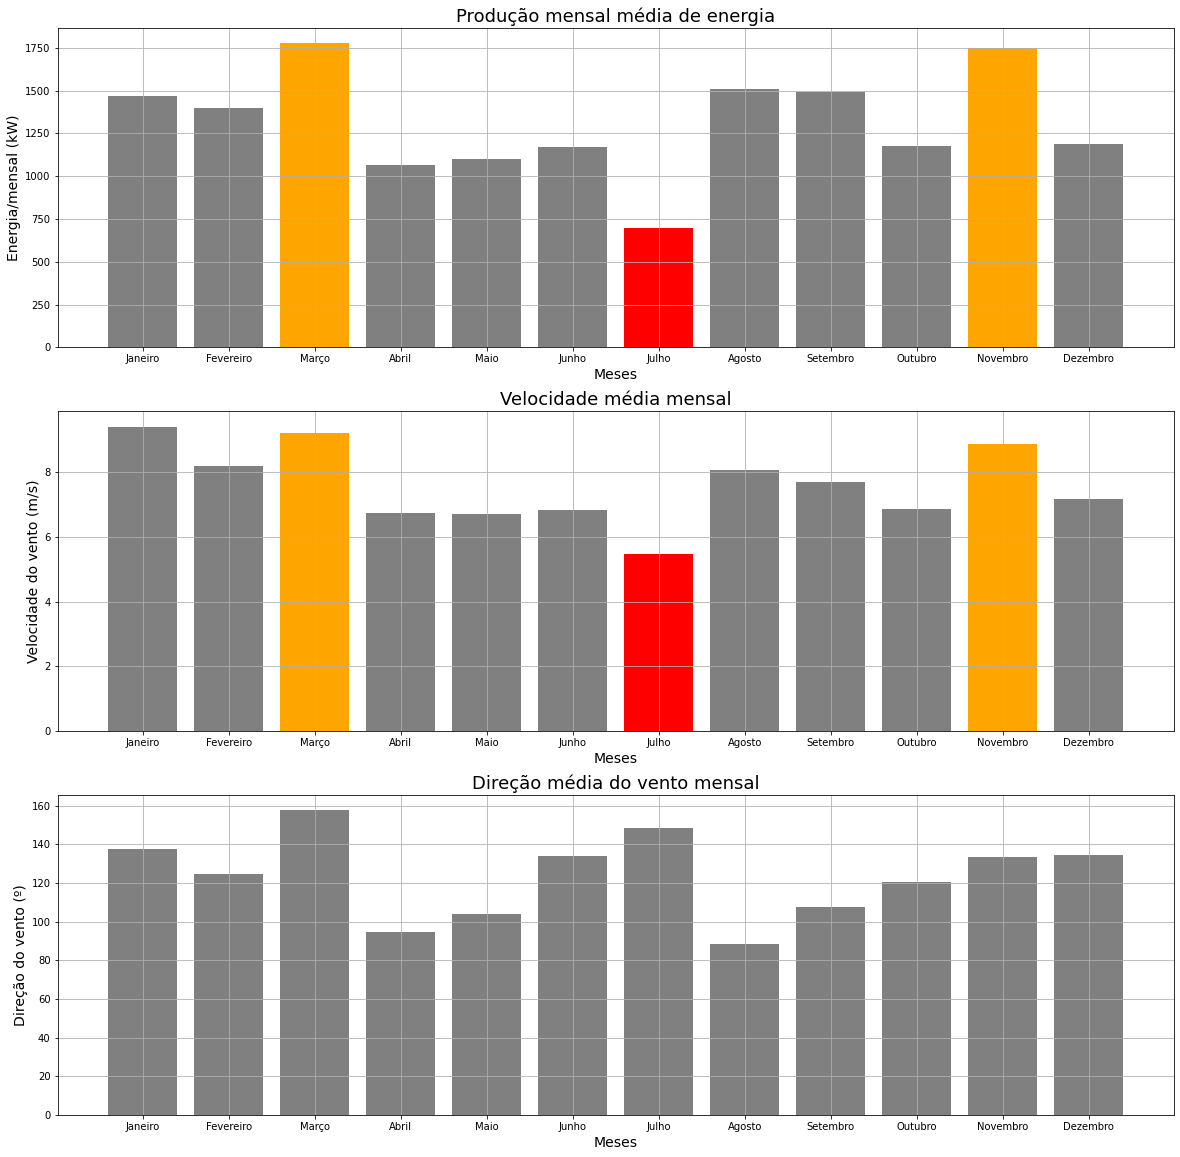

In [13]:
plt.figure(figsize=(20, 20))


# criando primeiro subplot
plt.subplot(3, 1, 1)
plt.grid()
color = list(np.full(12, 'grey'))
color[2], color[6], color[10] = 'orange', 'red', 'orange'
plt.bar(energia_mensal.index, height=energia_mensal.potencia_ativa, color=color)
plt.title('Produção mensal média de energia', fontsize=18)
plt.ylabel('Energia/mensal (kW)', fontsize=14)
plt.xlabel('Meses', fontsize=14)

# criando segundo subplot
plt.subplot(3, 1, 2)
color = list(np.full(12, 'grey'))
color[2], color[6], color[10] = 'orange', 'red', 'orange'
plt.grid()
plt.bar(x=vento_mes.index, height=vento_mes.velocidade_vento, color=color)
plt.title('Velocidade média mensal', fontsize=18)
plt.ylabel('Velocidade do vento (m/s)', fontsize=14)
plt.xlabel('Meses', fontsize=14)

# criando terceiro subplot
plt.subplot(3, 1, 3)
color = list(np.full(12, 'grey'))
plt.grid()
plt.bar(x=vento_mes.index, height=vento_mes.direcao_vento, color=color)
plt.title('Direção média do vento mensal', fontsize=18)
plt.ylabel('Direção do vento (º)', fontsize=14)
plt.xlabel('Meses', fontsize=14)


## 2ª - Quantidade diária de produção de energia

Existe alguma diferença entre as horas para a produção média de energia?

In [14]:
# agrupando o dataframe da energia produzina por hora
energia_hora = turbina_df.groupby(turbina_df.index.hour).mean()

# renomeando o nome da coluna e do índice
energia_hora.columns.name = 'features'
energia_hora.index.name = 'Hora do dia'

# visualizando o dataframe
energia_hora

features     potencia_ativa  velocidade_vento  potencia_teorica  direcao_vento
Hora do dia                                                                   
0               1385.044023          7.850671       1568.735677     133.480092
1               1375.151801          7.885823       1568.980273     131.191982
2               1382.937343          7.886549       1575.770090     131.531560
3               1375.325266          7.890250       1578.654134     130.114486
4               1393.639176          7.885168       1588.432064     128.740767
5               1323.467826          7.681868       1515.403518     127.089092
6               1243.540404          7.351122       1417.321563     124.988257
7               1178.739047          7.093343       1343.307290     124.730761
8               1091.950881          6.923616       1267.907163     123.608422
9               1066.081309          6.852548       1245.238778     121.295697
10              1056.424411          6.807725       1225.549761     119.256295
11              1066.081574          6.728645       1224.763043     116.934503
12              1077.400584          6.760152       1241.093748     113.914057
13              1157.791665          6.990996       1327.693629     112.197359
14              1242.675353          7.346695       1429.404249     111.902072
15              1326.210086          7.622527       1533.561081     111.218167
16              1416.554473          7.891632       1627.960264     114.449264
17              1462.102353          8.005272       1662.123678     119.564821
18              1468.745514          8.013248       1663.520099     121.302419
19              1470.252939          7.992402       1654.213789     127.741106
20              1477.415073          8.030057       1669.928670     130.131781
21              1453.363369          7.963324       1638.922286     131.221810
22              1445.170388          7.939352       1621.159707     129.851997
23              1422.379300          7.915866       1594.566117     131.619532

* PRODUÇÃO DE ENERGIA POR HORA 

Text(0.5, 0, 'Hora')

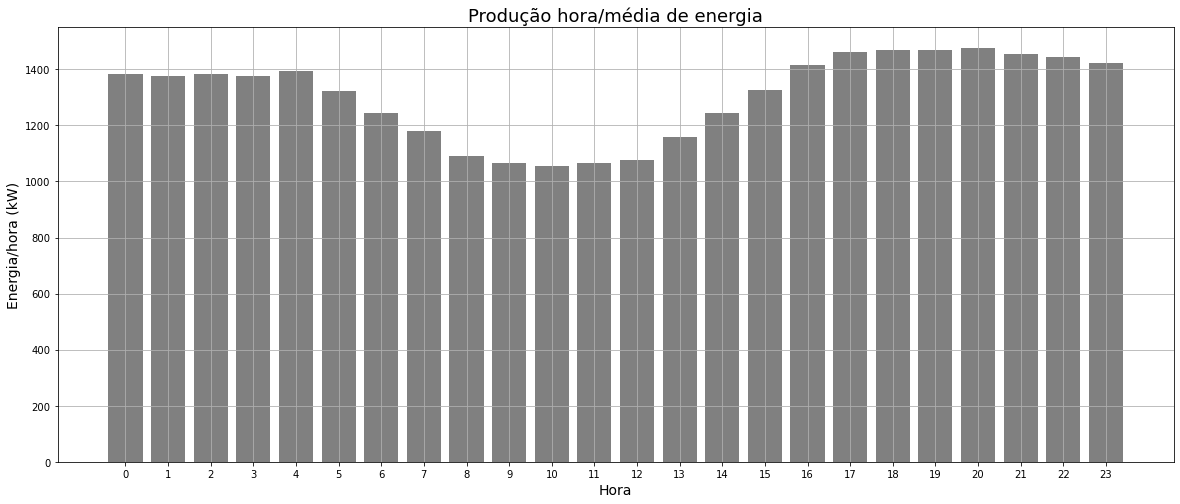

In [15]:
color = list(np.full(12, 'gray'))

plt.figure(figsize=(20, 8))
plt.grid(True)
plt.bar(x=energia_hora.index, height=energia_hora['potencia_ativa'], color=color)
plt.title('Produção hora/média de energia', fontsize=18)
plt.ylabel('Energia/hora (kW)', fontsize=14)
plt.xticks([x for x in range(24)])
plt.xlabel('Hora', fontsize=14)

* VELOCIDADE MÉDIA DO VENTO POR HORA

Text(0.5, 0, 'Hora')

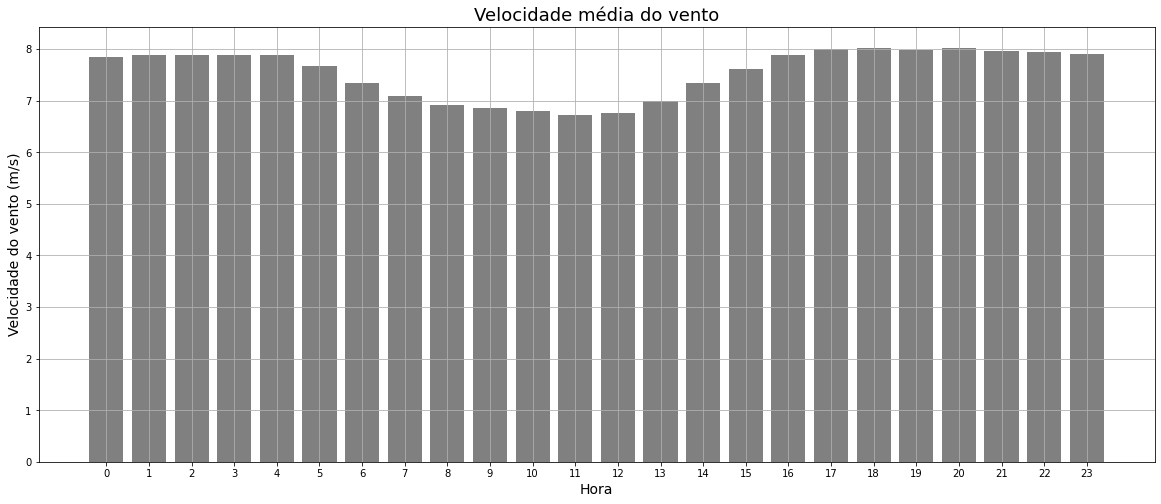

In [16]:
color = list(np.full(12, 'gray'))

plt.figure(figsize=(20, 8))
plt.grid(True)
plt.bar(x=energia_hora.index, height=energia_hora['velocidade_vento'], color=color)
plt.title('Velocidade média do vento', fontsize=18)
plt.ylabel('Velocidade do vento (m/s)', fontsize=14)
plt.xticks([x for x in range(24)])
plt.xlabel('Hora', fontsize=14)

* ANGULAÇÃO MEDIA POR HORA

Text(0.5, 0, 'Hora')

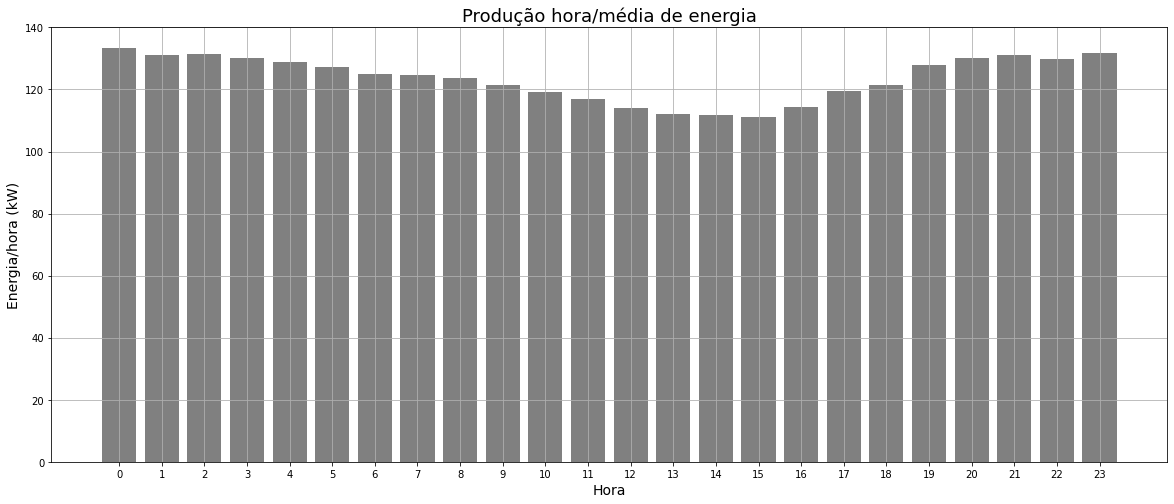

In [17]:
color = list(np.full(12, 'gray'))

plt.figure(figsize=(20, 8))
plt.grid(True)
plt.bar(x=energia_hora.index, height=energia_hora['direcao_vento'], color=color)
plt.title('Produção hora/média de energia', fontsize=18)
plt.ylabel('Energia/hora (kW)', fontsize=14)
plt.xticks([x for x in range(24)])
plt.xlabel('Hora', fontsize=14)

**RESPOSTA:** Sim, existe diferença na produção de energia na hora. A menor produção ocorre entre 8 e 12 horas e a maior produção durante 16 e 20 horas. Ademais, pode-se obter a mesmas conclusões do item 2º.

## 3ª - Existe alguma correlação entre a velocidade do vento, a direção do vento e a produção de energia?

In [18]:
plt.figure(figsize=(20, 8))
turbina_df.corr()

potencia_ativa  velocidade_vento  potencia_teorica  \
potencia_ativa          1.000000          0.912774          0.949918   
velocidade_vento        0.912774          1.000000          0.944209   
potencia_teorica        0.949918          0.944209          1.000000   
direcao_vento          -0.062702         -0.077188         -0.099076   

                  direcao_vento  
potencia_ativa        -0.062702  
velocidade_vento      -0.077188  
potencia_teorica      -0.099076  
direcao_vento          1.000000

<Figure size 1440x576 with 0 Axes>

**RESPOSTA:** A tabela acima só confirma os resultados verificados nos gráficos.  

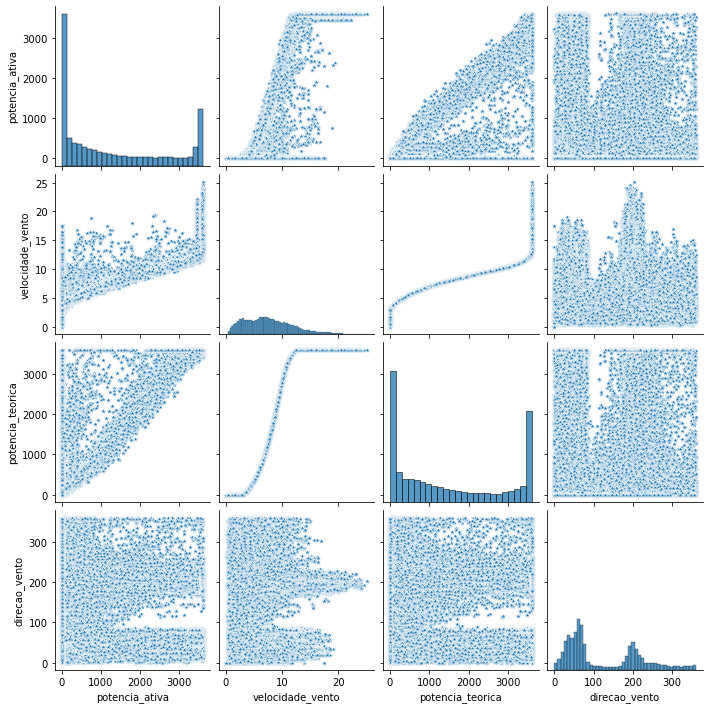

In [19]:
sns.pairplot(turbina_df, markers='*')

**RESPOSTA:** A velocidade do vento e a produção de energia estão altamente correlacionadas, como seria de esperar. Podemos ver que há produção de energia de nível inferior para algumas direções de vento.

## 4ª - Qual é o nível médio de saída de energia para diferentes velocidades do vento?

https://www.geeksforgeeks.org/pandas-cut-method-in-python/

https://pandas.pydata.org/docs/reference/api/pandas.cut.html

Text(0, 0.5, 'Produção média de energia por intervalo (kW)')

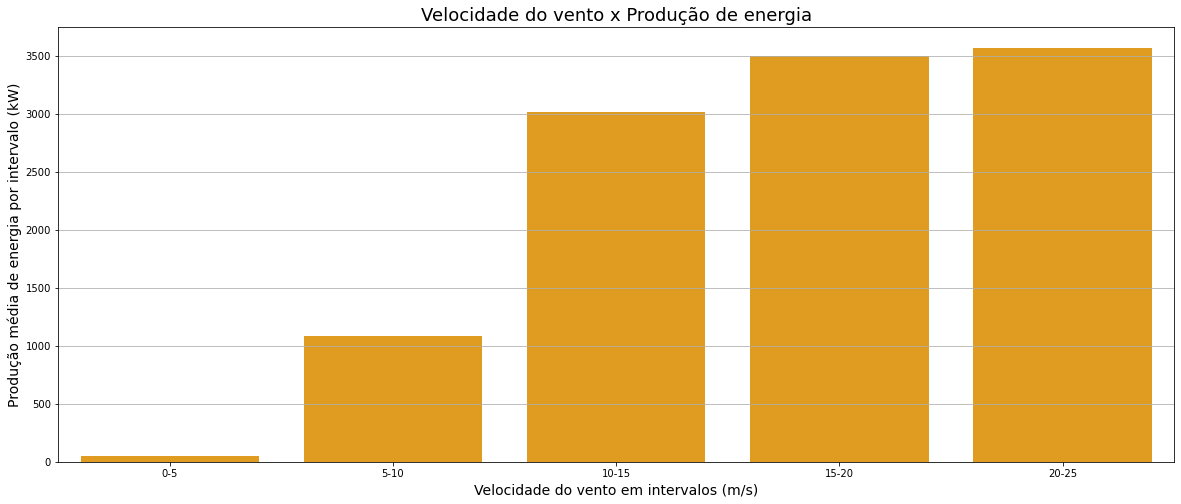

In [20]:
# Finding average power production for 5 m/s wind speed increments

# variáveis auxiliares
classes = [
    0,
    5,
    10,
    15,
    20,
    25
]

labels = ['0-5', '5-10', '10-15', '15-20', '20-25']

# criando nova coluna no df
turbina_df['classificacao_vento'] = pd.cut(x = turbina_df.velocidade_vento,
         bins = classes,
         labels = labels,
         include_lowest = True)

# agrupando os valores
agrupa_vento = turbina_df.groupby('classificacao_vento').mean()

# gerando o gráfico
plt.figure(figsize=(20, 8))
plt.grid()
sns.barplot(x=agrupa_vento.index, y='potencia_ativa', color='orange', data=agrupa_vento)
plt.title('Velocidade do vento x Produção de energia', fontsize=18)
plt.xlabel('Velocidade do vento em intervalos (m/s)', fontsize=14)
plt.ylabel('Produção média de energia por intervalo (kW)', fontsize=14)

A partir do gráfico acima pode-se perceber que a produção de energia cresce com um aumento da velocidade. Além disso, no intervalo 0-5 a produção de energia é baixíssima e de 15-20 e 20-25 há uma pouca variação na produção de energia.

## 5ª - Qual é a potência de saída para diferentes direções e velocidades do vento?

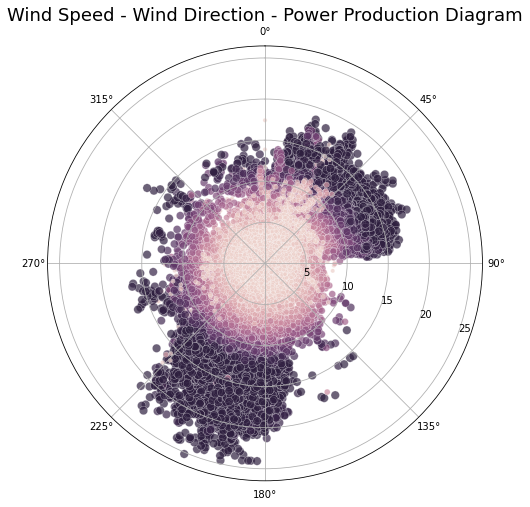

In [21]:
from math import radians

plt.figure(figsize=(20, 8))
ax = plt.subplot(111, polar=True)

# Inside circles are the wind speed and marker color and size represents the amount of power production
sns.scatterplot(x=[radians(x) for x in turbina_df.direcao_vento], 
                y=turbina_df.velocidade_vento,
                size=turbina_df.potencia_ativa,
                hue=turbina_df.potencia_ativa,
                alpha=0.7, legend=None)

# Setting the polar diagram's top represents the North 
ax.set_theta_zero_location('N')
# Setting -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
ax.set_rlabel_position(110)
plt.title('Wind Speed - Wind Direction - Power Production Diagram', fontsize=18)
plt.ylabel(None);

Text(0, 0.5, 'Direção do vento em graus º')

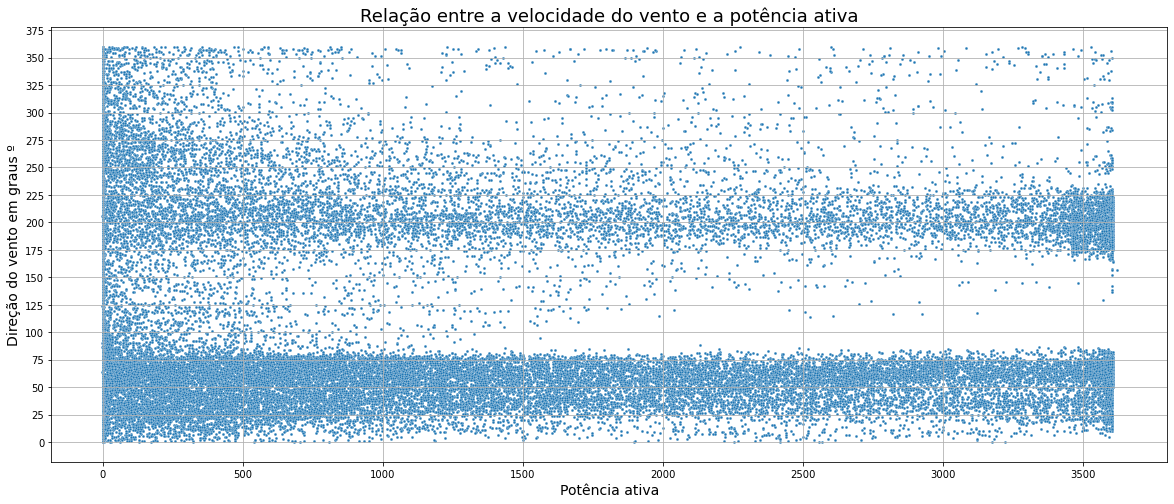

In [22]:
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x=turbina_df.potencia_ativa, y=turbina_df.direcao_vento,
                     data=turbina_df, s=8)
plt.grid()
ax.set_title('Relação entre a velocidade do vento e a potência ativa', fontsize=18)
ax.set_xlabel('Potência ativa', fontsize=14)
ax.set_yticks([x for x in range(0, 400, 25)])
ax.set_ylabel('Direção do vento em graus º', fontsize=14)

As angulações entre 0-90º e 180-225º têm as maiores produções de energia.

## 6ª - Produção de energia no ano de 2018

Text(0.5, 0, 'Meses')

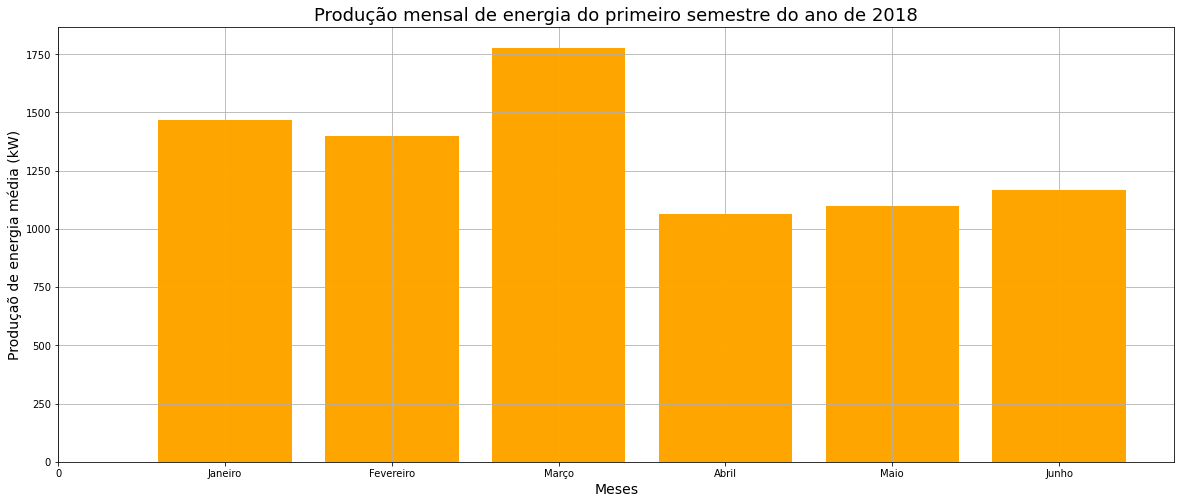

In [23]:
# criando o filtro
filtro = (turbina_df.index.year == 2018) & (turbina_df.index.month < 7)

# aplicando o filtro
turbina_2018 = turbina_df[filtro]

# agrupando pela média
agrupamento_2018 = turbina_2018.groupby(turbina_2018.index.month).mean()

# criando o gráfico de barras
plt.figure(figsize=(20, 8))
plt.grid()
plt.bar(x=agrupamento_2018.index, height=agrupamento_2018.potencia_ativa, color='orange')
plt.title('Produção mensal de energia do primeiro semestre do ano de 2018', fontsize=18)
plt.ylabel('Produçaõ de energia média (kW)', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=[0, 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'])
plt.xlabel('Meses', fontsize=14)

## 7ª - Velocidade do vento e produção de energia

Nesta etapa vamos verificar como a potência teórica e ativa se comportam com o aumento da velocidade do vendo.

Text(0.5, 0, 'Potência produzida (kW)')

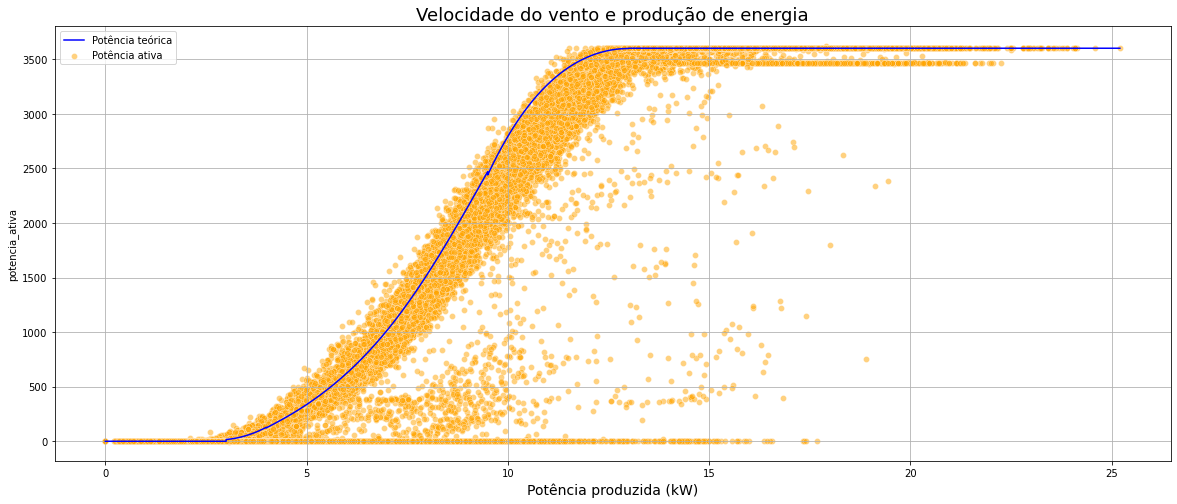

In [24]:
plt.figure(figsize=(20, 8))


sns.scatterplot(x=turbina_df.velocidade_vento, y=turbina_df.potencia_ativa,
                     data=turbina_df, color='orange', alpha=0.5, label='Potência ativa')

sns.lineplot(x=turbina_df.velocidade_vento, y=turbina_df.potencia_teorica,
             data=turbina_df, color='blue', label='Potência teórica')

plt.grid()
plt.title("Velocidade do vento e produção de energia", fontsize=18)
plt.xlabel("Velocidade do vento (m/s)", fontsize=14)
plt.xlabel("Potência produzida (kW)", fontsize=14)

**TEÓRICO**

A relação entre a `velocidade do vento` e a `potência teórica` é positiva, isto é, o aumento da velocidade causa o aumento da potência. Além disso, observar-se que a potência tem um limite máximo, isto é, a partir da velocidade de 11 m/s, a potência produzida alcança o seu valor máximo e existe uma velocidade mínima para começar a produzir potência.

<hr>

**REAL**

A relação entre a `velocidade do vento` e a `potência ativa` é positiva, isto é, o aumento da velocidade causa o aumento da potência. Além disso, observar-se que a potência tem um limite máximo, isto é, a partir da velocidade de 11 m/s, a potência produzida alcança o seu valor máximo e existe uma velocidade mínima para começar a produzir potência. Cabe salientar que, existem muitas medições zeradas, pois no momento da aferição não foi possível captar a potência produzida, apesar de haver velocidades de vento com energia suficiente para produzir energia.


A partir do gráfico acima, podemos ver que a curva teórica de produção de energia geralmente se encaixa bem com a produção real.

Podemos ver que a produção de energia atinge um nível máximo e continua em linha reta se a velocidade do vento atingir 15 m/s.

Também podemos ver que existem cerca de 0 potência de saída, mesmo a velocidade do vento é superior a 5 m / s. Quero investigar o motivo.

Mas antes qual é a velocidade mínima do vento para a curva teórica de produção de energia?

**COMPARAÇÃO ENTRE A POTÊNCIA TEÓRICA E REAL**

De forma geral, encontra-se muita mais potências abaixo dos valores teóricos do que acima.

Pode-se analisar de uma forma bem rúde a potência:

$P = v_{vento}.\eta_{rotor}$

onde:

$\eta_{rotor}$ considera-se como valor constante;

$v_{vento}$ é um valor variável.

Portanto, nos pontos em que a potência supera a teoria pode-se considerar que alguns parâmetro relacionado ao vento influênciou nesse resultado como também uma aferição errônea. Já nos pontos em que o valor real está abaixo do valor teórico, considera-se normal, pois é esperada a perda de energia devido ao rendimento do motor e perdas por atrito.

<hr>

### Qual é o valor limite da velocidade do vento para potência teórica zero?

Text(0, 0.5, 'Distribuição para 0 produção de energia')

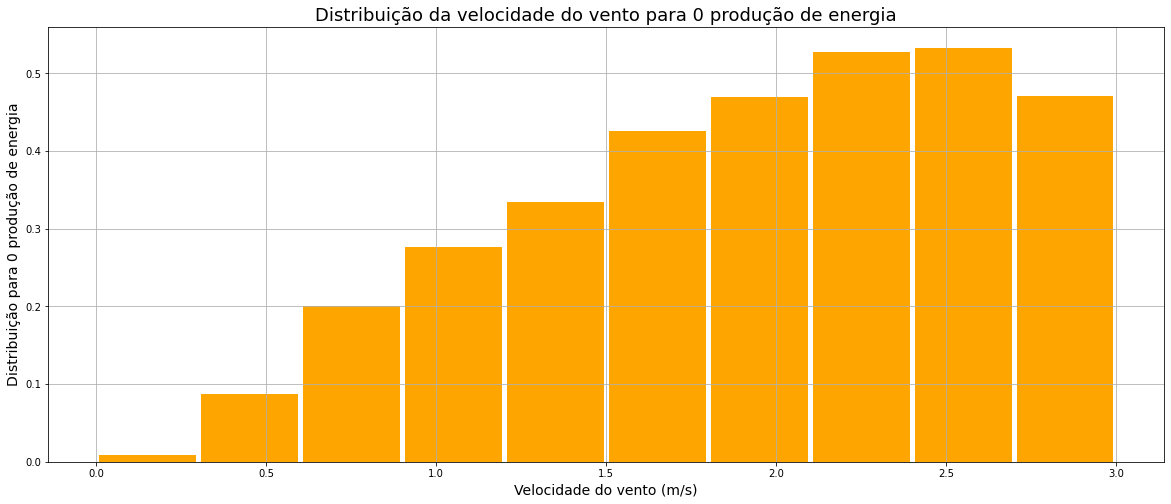

In [25]:
# criando o dataframe
potencia_zero = turbina_df.query(expr='(potencia_teorica == 0) and (potencia_ativa == 0)')

# plotando o histograma
plt.figure(figsize=(20, 8))
plt.grid()
plt.hist(x=potencia_zero.velocidade_vento, density=True, rwidth=0.95, color='orange')
plt.title('Distribuição da velocidade do vento para 0 produção de energia', fontsize=18)
plt.xlabel('Velocidade do vento (m/s)', fontsize=14)
plt.ylabel('Distribuição para 0 produção de energia', fontsize=14)

Podemos ver pelo gráfico acima, o limite para a curva de potência teórica é de 3 m/s de velocidade do vento. Se a velocidade do vento for inferior a 3 m/s, o modelo não prevê qualquer produção de energia.

Mas existem algumas observações para produção de energia 0, mesmo que a velocidade do vento seja superior a 3 m / s.

### Por que não há produção de energia em algumas observações enquanto a velocidade do vento é superior a 3 m/s?

Text(0, 0.5, 'Distribuição para 0 produção de energia')

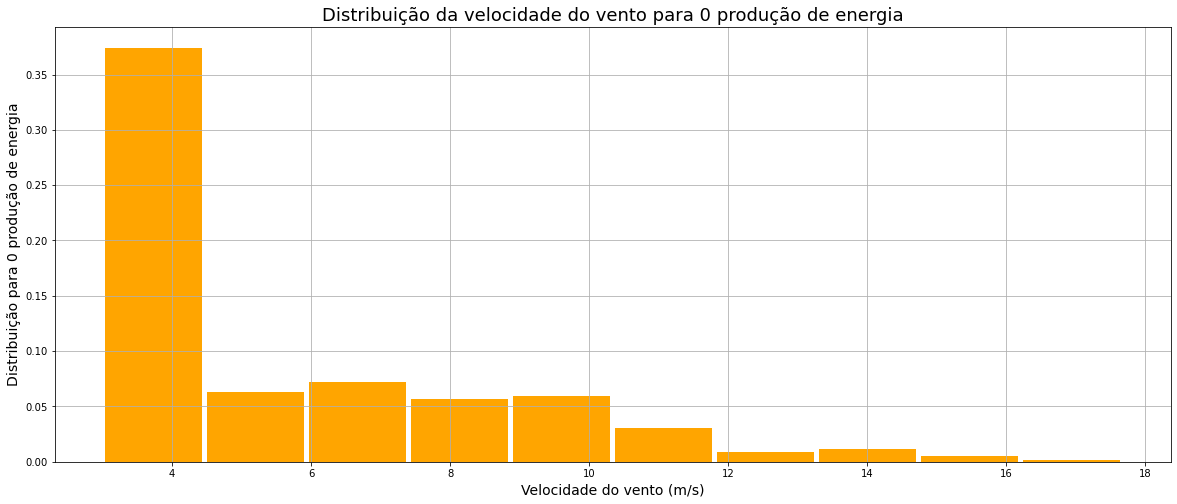

In [26]:
# criando o dataframe
potencia_zero = turbina_df.query(expr='(potencia_teorica != 0) and (potencia_ativa == 0) and (velocidade_vento > 3)')

# criando o histograma
plt.figure(figsize=(20, 8))
plt.grid()
plt.hist(x=potencia_zero.velocidade_vento, density=True, rwidth=0.95, color='orange')
plt.title('Distribuição da velocidade do vento para 0 produção de energia', fontsize=18)
plt.xlabel('Velocidade do vento (m/s)', fontsize=14)
plt.ylabel('Distribuição para 0 produção de energia', fontsize=14)

In [27]:
print(f'Existem {potencia_zero.shape[0]} registros onde a velocidade do vento é superior a 3 m/s e não tem potência sendo produzida/registrada')

Existem 3497 registros onde a velocidade do vento é superior a 3 m/s e não tem potência sendo produzida/registrada


In [28]:
columns = turbina_df.columns
columns

Index(['potencia_ativa', 'velocidade_vento', 'potencia_teorica',
       'direcao_vento', 'classificacao_vento'],
      dtype='object')

Parece que teoricamente o limite de velocidade do vento deve ser de 4 m/s. Mas também há outras observações com produção de energia zero enquanto a velocidade do vento é maior.

Assim, nesta análise estes registros serão considerados outliers.


### Verificando outros outliers

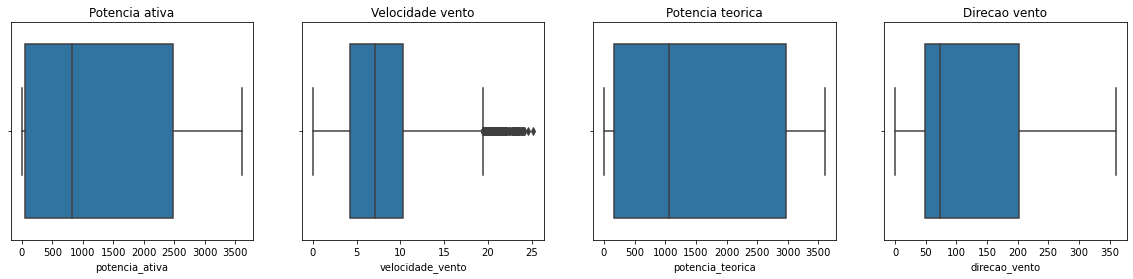

In [29]:
columns = ['potencia_ativa', 'velocidade_vento', 'potencia_teorica',
       'direcao_vento']
i=1

plt.figure(figsize=(20, 4))
for each in columns:
    df = turbina_df[each]
    plt.subplot(1, 4, i)
    sns.boxplot(df)
    plt.title(each.upper().replace('_',' ').capitalize())
    i += 1

Pelo gráfico acima é possível inferir que a velocidade do vento tem alguns valores que devem ser investigados.

In [30]:
# Defining the quantiles and interquantile range
Q1 = turbina_df.velocidade_vento.quantile(0.25)
Q3 = turbina_df.velocidade_vento.quantile(0.75)
IQR = Q3-Q1
# Defining the lower and upper threshold values
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('Quantile (0.25): ', Q1, '  Quantile (0.75): ', Q3)
print('Lower threshold: ', lower, ' Upper threshold: ', upper)

Quantile (0.25):  4.201395392417902   Quantile (0.75):  10.30001997947685
Lower threshold:  -4.946541488170519  Upper threshold:  19.447956860065272


In [31]:
# Fancy indexing for outliers
outlier_tf = ((turbina_df.velocidade_vento < lower) | (turbina_df.velocidade_vento > upper))

In [32]:
print('Total Number of Outliers: ', turbina_df.velocidade_vento[outlier_tf].shape[0])
print('--'*15)
print('Some Examples of Outliers:')
turbina_df.velocidade_vento[outlier_tf].sample(10).to_frame()

Total Number of Outliers:  423
------------------------------
Some Examples of Outliers:


velocidade_vento
data/tempo                           
2018-01-04 02:00:00         21.142811
2018-02-02 06:00:00         20.183750
2018-04-02 14:30:00         19.823050
2018-04-02 06:10:00         22.811171
2018-04-02 02:30:00         20.098289
2018-07-03 02:50:00         20.548849
2018-12-24 16:10:00         20.564859
2018-03-02 03:50:00         19.470400
2018-03-02 09:40:00         20.068830
2018-03-20 05:30:00         22.924009

Pergunta: Quais são os critérios gerais para a produção de energia?
É importante entender o padrão nos dados. Devemos aprender os dados antes da máquina.

1. Vimos pelo gráfico que em março, agosto e novembro, a produção média de energia é maior.

2. A potência média é maior diariamente entre as 16:00 e as 24:00.

3. A potência é maior quando o vento sopra das direções entre 000-090 e 180-225 graus.

Então, vamos tentar prever um nível alto e baixo de produção de energia a partir dos critérios acima antes do algoritmo ML.

Text(0, 0.5, 'Potencia ativa $(kw)$')

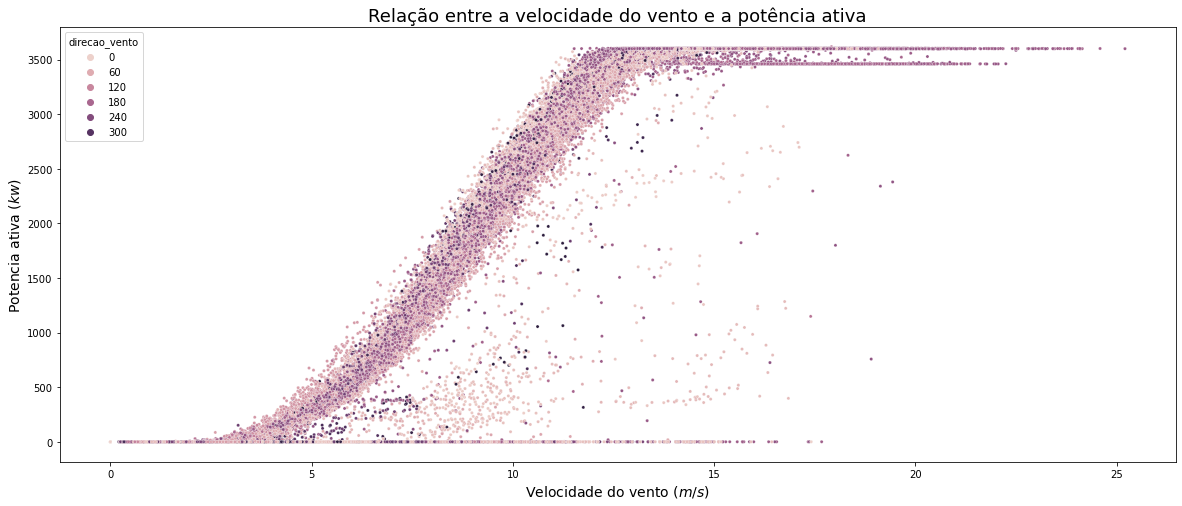

In [33]:
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x=turbina_df.velocidade_vento, y=turbina_df.potencia_ativa,
                     data=turbina_df, hue=turbina_df.direcao_vento, s=10)

ax.set_title('Relação entre a velocidade do vento e a potência ativa', fontsize=18)
ax.set_xlabel('Velocidade do vento $(m/s)$', fontsize=14)
ax.set_ylabel('Potencia ativa $(kw)$', fontsize=14)

In [34]:
turbina_df['erro'] = round((abs(turbina_df.potencia_ativa - turbina_df.potencia_teorica) / turbina_df.potencia_teorica)*100, 2)

In [35]:
turbina_df.sample(3)

potencia_ativa  velocidade_vento  potencia_teorica  \
data/tempo                                                                
2018-01-23 14:00:00      309.944214          8.180095        1634.75406   
2018-03-21 16:50:00     3604.249023         14.176170        3600.00000   
2018-02-03 06:30:00     3461.812012         16.062759        3600.00000   

                     direcao_vento classificacao_vento   erro  
data/tempo                                                     
2018-01-23 14:00:00      27.411610                5-10  81.04  
2018-03-21 16:50:00     216.710693               10-15   0.12  
2018-02-03 06:30:00     192.567795               15-20   3.84

In [36]:
turbina_df.erro.describe()

count    43246.0000
mean            inf
std             NaN
min          0.0000
25%          4.4025
50%         12.3300
75%         22.3500
max             inf
Name: erro, dtype: float64

In [37]:
potencia_zero = turbina_df[turbina_df.potencia_ativa == 0]
potencia_zero.head(10)

potencia_ativa  velocidade_vento  potencia_teorica  \
data/tempo                                                                
2018-03-01 15:40:00             0.0          3.743307         83.986265   
2018-03-01 16:10:00             0.0          2.142016          0.000000   
2018-03-01 16:20:00             0.0          2.501406          0.000000   
2018-03-01 16:30:00             0.0          2.668578          0.000000   
2018-03-01 16:40:00             0.0          3.034003         17.180593   
2018-03-01 16:50:00             0.0          3.197354         25.431221   
2018-03-01 17:00:00             0.0          3.907811        110.979604   
2018-04-01 12:40:00             0.0          2.888112          0.000000   
2018-04-01 12:50:00             0.0          2.386636          0.000000   
2018-04-01 13:00:00             0.0          2.476816          0.000000   

                     direcao_vento classificacao_vento   erro  
data/tempo                                                     
2018-03-01 15:40:00     245.068207                 0-5  100.0  
2018-03-01 16:10:00     234.762405                 0-5    NaN  
2018-03-01 16:20:00     223.308807                 0-5    NaN  
2018-03-01 16:30:00     226.051697                 0-5    NaN  
2018-03-01 16:40:00     221.086502                 0-5  100.0  
2018-03-01 16:50:00     232.679596                 0-5  100.0  
2018-03-01 17:00:00     241.973099                 0-5  100.0  
2018-04-01 12:40:00       0.000000                 0-5    NaN  
2018-04-01 12:50:00     139.275101                 0-5    NaN  
2018-04-01 13:00:00     153.855606                 0-5    NaN

In [38]:
potencia_sem_zero = turbina_df[turbina_df.potencia_ativa != 0]
potencia_sem_zero.head()

potencia_ativa  velocidade_vento  potencia_teorica  \
data/tempo                                                                
2018-01-01 00:00:00      380.047791          5.311336        416.328908   
2018-01-01 00:10:00      453.769196          5.672167        519.917511   
2018-01-01 00:20:00      306.376587          5.216037        390.900016   
2018-01-01 00:30:00      419.645905          5.659674        516.127569   
2018-01-01 00:40:00      380.650696          5.577941        491.702972   

                     direcao_vento classificacao_vento   erro  
data/tempo                                                     
2018-01-01 00:00:00     259.994904                5-10   8.71  
2018-01-01 00:10:00     268.641113                5-10  12.72  
2018-01-01 00:20:00     272.564789                5-10  21.62  
2018-01-01 00:30:00     271.258087                5-10  18.69  
2018-01-01 00:40:00     265.674286                5-10  22.59

Text(0, 0.5, 'Potencia ativa $(kw)$')

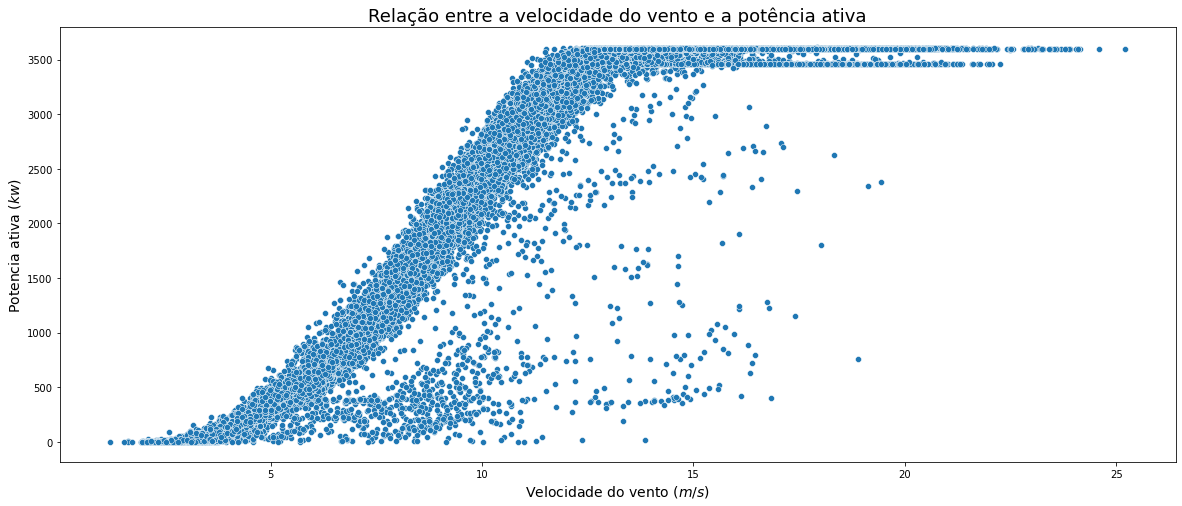

In [39]:
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x='velocidade_vento', y='potencia_ativa',
                     data=potencia_sem_zero)

ax.set_title('Relação entre a velocidade do vento e a potência ativa', fontsize=18)
ax.set_xlabel('Velocidade do vento $(m/s)$', fontsize=14)
ax.set_ylabel('Potencia ativa $(kw)$', fontsize=14)

## 8ª - Filtrando os valores de 5% acima e abaixo 

A empresa pediu um df com o filtro de 5% para cima e para baixo

In [40]:
# transformando as Series em listas
pot_real= turbina_df.potencia_ativa.tolist()
pot_teorica = turbina_df.potencia_teorica.tolist()

# variáveis auxiliares
pot_max=[]
pot_min=[]
dentro_limite = []

# limite
i = 5

for potencia in pot_teorica:
    pot_max.append(potencia*(1 + i/100))
    pot_min.append(potencia*(1 - i/100))

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('potencia_dentro_do_limite')
    elif potencia==0:
        dentro_limite.append('potencia_igual_0')
    else:
        dentro_limite.append('potencia_fora_do_limite')

turbina_df['limite'] = dentro_limite

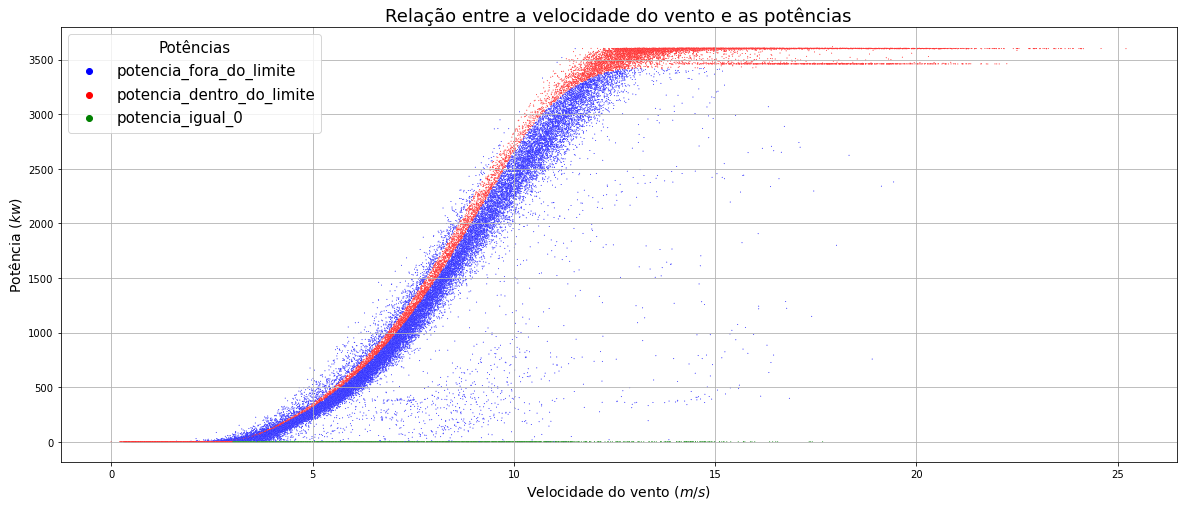

In [41]:
plt.figure(figsize=(20, 8))
plt.grid(True)

cores = {
    'potencia_dentro_do_limite':'red',
    'potencia_igual_0':'green',
    'potencia_fora_do_limite':'blue'
}
ax = sns.scatterplot(x=turbina_df.velocidade_vento, y=turbina_df.potencia_ativa,
                     data=turbina_df, hue=turbina_df.limite, s=1,
                    palette=cores)

ax.set_title('Relação entre a velocidade do vento e as potências', fontsize=18)
ax.set_xlabel('Velocidade do vento $(m/s)$', fontsize=14)
ax.set_ylabel('Potência $(kw)$', fontsize=14)
plt.legend(title='Potências', title_fontsize=15, prop={'size': 15})

In [42]:
potencias_limite = turbina_df[turbina_df.limite == 'potencia_dentro_do_limite']
potencias_limite.head()

potencia_ativa  velocidade_vento  potencia_teorica  \
data/tempo                                                                
2018-01-01 02:40:00      742.985291          6.378913        759.434537   
2018-01-01 02:50:00      748.229614          6.446653        785.281010   
2018-01-01 03:00:00      736.647827          6.415083        773.172863   
2018-01-01 03:10:00      787.246216          6.437531        781.771216   
2018-01-01 03:20:00      722.864075          6.220024        700.764700   

                     direcao_vento classificacao_vento  erro  \
data/tempo                                                     
2018-01-01 02:40:00     266.593292                5-10  2.17   
2018-01-01 02:50:00     265.571808                5-10  4.72   
2018-01-01 03:00:00     261.158691                5-10  4.72   
2018-01-01 03:10:00     257.560211                5-10  0.70   
2018-01-01 03:20:00     255.926498                5-10  3.15   

                                        limite  
data/tempo                                      
2018-01-01 02:40:00  potencia_dentro_do_limite  
2018-01-01 02:50:00  potencia_dentro_do_limite  
2018-01-01 03:00:00  potencia_dentro_do_limite  
2018-01-01 03:10:00  potencia_dentro_do_limite  
2018-01-01 03:20:00  potencia_dentro_do_limite

### Verificando a relação entre potência e velocidade do vento

Text(0, 0.5, 'Direção do vento')

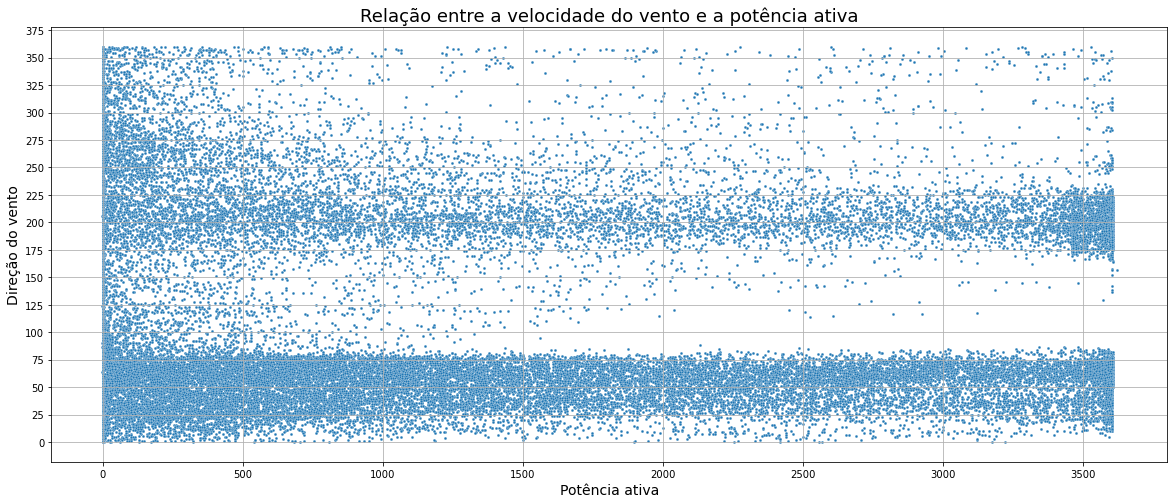

In [43]:
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x=turbina_df.potencia_ativa, y=turbina_df.direcao_vento,
                     data=turbina_df, s=8)

plt.grid()
ax.set_title('Relação entre a velocidade do vento e a potência ativa', fontsize=18)
ax.set_xlabel('Potência ativa', fontsize=14)
ax.set_yticks([x for x in range(0, 400, 25)])
ax.set_ylabel('Direção do vento', fontsize=14)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

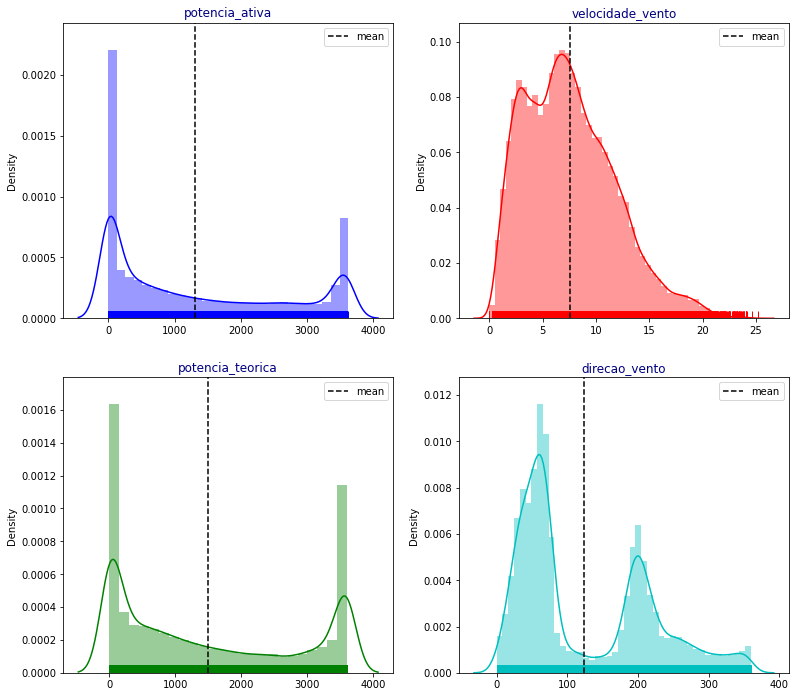

In [44]:
cols = [i for i in turbina_df.columns if i not in ['classificacao_vento', 'erro', 'limite']]

cols = ['potencia_ativa', 'velocidade_vento', 'potencia_teorica','direcao_vento']
        
length = len(cols)
cs = ["b", "r", "g", "c", "m", "k", "lime", "c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols, range(length), cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(turbina_df[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(turbina_df[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")

## CONCLUSÕES GERAIS:

Os critérios gerais para a produção de energia são:

1. Vimos pelo gráfico que em março, agosto e novembro, a produção média de energia é maior;

2. A potência média é maior diariamente entre as 16:00 e as 24:00;

3. A velocidade do vento e potência ativa estão altamente correlacionadas;

4. A potência é maior quando o vento sopra das direções entre 000-090 e 180-225 graus.

5. O limite de produção de energia teórico tem uma velocidade de vento de 3 m/s, porém na realidade o observado foi de 4 m/s;


## 3º - MODELAGEM PREDITIVA

O objetivo inicial desta modelagem preditiva é encontrar o melhor modelo para inferir qual vai ser a potência produzina com dados de entrada: a velocidade e direção do vento. Não se levou em consideração a variável do tempo, pois o foco não foi fazer uma predição no próximo valor.

## Ajustando o DataFrame original e removendo os outliers

In [45]:
turbina_df.sample(3)

potencia_ativa  velocidade_vento  potencia_teorica  \
data/tempo                                                                
2018-01-01 17:00:00     2118.389893          9.098683        2207.79282   
2018-08-26 09:20:00        0.000000          2.946398           0.00000   
2018-04-29 09:00:00        0.000000          2.322312           0.00000   

                     direcao_vento classificacao_vento  erro  \
data/tempo                                                     
2018-01-01 17:00:00     223.960907                5-10  4.05   
2018-08-26 09:20:00      42.411789                 0-5   NaN   
2018-04-29 09:00:00     159.543106                 0-5   NaN   

                                        limite  
data/tempo                                      
2018-01-01 17:00:00  potencia_dentro_do_limite  
2018-08-26 09:20:00  potencia_dentro_do_limite  
2018-04-29 09:00:00  potencia_dentro_do_limite

In [46]:
predict_df = turbina_df.loc[:, ['potencia_ativa', 'velocidade_vento' ,'direcao_vento']].copy()
predict_df.head()

potencia_ativa  velocidade_vento  direcao_vento
data/tempo                                                          
2018-01-01 00:00:00      380.047791          5.311336     259.994904
2018-01-01 00:10:00      453.769196          5.672167     268.641113
2018-01-01 00:20:00      306.376587          5.216037     272.564789
2018-01-01 00:30:00      419.645905          5.659674     271.258087
2018-01-01 00:40:00      380.650696          5.577941     265.674286

## Seleção e separação das variáveis

<hr>

* Variável Y: Potência ativa

<hr>

* Variável X1: Velocidade do vento
* Variável X2: Direção do vento
* Variável X3: período de tempo **NÃO SERÁ CONSIDERADA**

<hr>

In [47]:
X = predict_df.drop(columns = 'potencia_ativa', axis=1)
y = predict_df.potencia_ativa

* Separando as amostras para treino e teste

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score

# Separando as variáves de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

* Importanto a bibliotecas para o pré-processamento

https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder

# # fazendo o preprocessamento dos dados
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


## Métricas de avaliação

As [métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) de avaliação para modelos regressivos são as seguintes:

*  **R2**


$R^{2}(y, \hat{y})= 1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}}$

The best possible score is 1.0, lower values are worse.

*  **MAE**

Como o próprio nome sugere, o MAE calcula o erro médio absoluto entre os valores
reais e os previstos. Ela retorna um valor não negativo, que quanto mais próximo de 0 indica que
os valores previstos encontram-se bem próximos dos reais. O cálculo do MAE é realizado com a a seguinte expressão:

$\text{MAE}(y, \hat{y}) = \frac{1}{n_{amostras}} \sum_{i=0}^{n_{amostras}-1} |y_{i} - \hat{y_{i}}|$

* **MSE**

Mais próximo de zero, melhor o modelo.

$\text{MSE}(y, \hat{y}) = \frac{1}{n_{amostras}} \sum_{i=0}^{n_{amostras}-1} (y_{i} - \hat{y_{i}})^{2}$

* **Explained variance**

$explained\_variance (y, \hat{y}) = 1 - \frac{Var(y - \hat{y})}{Var(y)}  $

The best possible score is 1.0, lower values are worse.

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evc

def validar_modelo(y_test, y_pred):
    i = 3
    print('      Métricas')
    print('***'*6)
    print(f' R2 : {round(r2_score(y_test, y_pred), i)}')
    print(f' EVC: {round(evc(y_test, y_pred), i)}')
    print('---'*6)
    print(f' MAE: {round(mae(y_test, y_pred), i)}')
    print(f' MSE: {round(mse(y_test, y_pred), i)}')
    print('***'*6)

## Suport Machine Vector 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR

In [64]:
%%time
from sklearn.svm import SVR

svc = SVR()
svc.fit(X_train, y_train)
validar_modelo(y_test, svc.predict(X_test))

      Métricas
******************
 R2 : 0.002
 EVC: 0.115
------------------
 MAE: 1033.939
 MSE: 1718386.522
******************
Wall time: 2min 45s


**O resultado para SMV padrão é muito ruim, por isso será desconsiderado na análise.**

In [52]:
%%time
from sklearn.svm import LinearSVR

lsvm = LinearSVR()
lsvm.fit(X_train, y_train)
validar_modelo(y_test, lsvm.predict(X_test))

 R2: 0.8224767401566502
 MAE: 384.61882414248174
 MSE: 305803.4610962634
 EVC: 0.8230305059492493
Wall time: 1.78 s


## K-MEANS

In [53]:
%%time
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=10)
kn.fit(X_train, y_train)
validar_modelo(y_test, kn.predict(X_test))

 R2: 0.9034683033725354
 MAE: 171.82752592528414
 MSE: 166286.53034099293
 EVC: 0.9034720627886885
Wall time: 194 ms


## Linear Regression - Regressão Linear

In [54]:
%%time
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
validar_modelo(y_test, lr.predict(X_test))

 R2: 0.8275737023542262
 MAE: 390.76178475388406
 MSE: 297023.37964400183
 EVC: 0.8275796014516147
Wall time: 22.9 ms


R2: 0.9034683033725354
 MAE: 171.82752592528414
 MSE: 166286.53034099293
Wall time: 112 ms

## Decision Tree - Árvore de decisão



In [55]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
validar_modelo(y_test, dt.predict(X_test))

 R2: 0.9019302035716411
 MAE: 176.4680301837279
 MSE: 168936.07746535286
 EVC: 0.9019431577589968
Wall time: 80.9 ms


 R2: 0.9019302035716411
 MAE: 176.4680301837279
 MSE: 168936.07746535286
 Wall time: 48.8 ms


## Random Forest - Floreasta aleatória

In [56]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=7, n_estimators=200)
rf.fit(X_train, y_train)
validar_modelo(y_test, rf.predict(X_test))

 R2: 0.9086594649279575
 MAE: 161.83876414132828
 MSE: 157344.18007005518
 EVC: 0.9086688540274235
Wall time: 8.63 s


## Escolha do melhor modelo

In [57]:
predict_df['predicao_random_forest'] = rf.predict(X)

<AxesSubplot:xlabel='velocidade_vento', ylabel='potencia_ativa'>

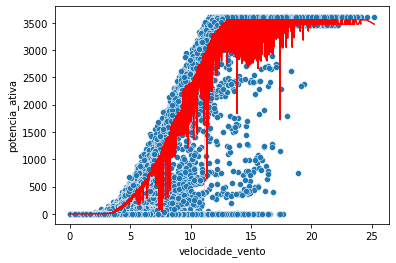

In [58]:
sns.scatterplot(x='velocidade_vento', y='potencia_ativa', data=predict_df )
sns.lineplot(x='velocidade_vento', y='predicao_random_forest', data=predict_df, color='red')

## Deploy

In [59]:
modelo_escolhido = rf.fit(X_train, y_train)

In [60]:
features = ['Velocidade do vento (m/s): ', 'Direção do vento (º): ']
f_values = []

for i in features:
    feature = float(input(f'{i}'))
    f_values.append(feature)

ar_predict = [f_values]


modelo_escolhido.predict(ar_predict)[0]

Velocidade do vento (m/s):  5
Direção do vento (º):  6


276.1061536798512